# IF5100 Programming for Data Analytics | Tugas Besar

### Kelompok 9:
Clement Nathanael Lim / 18222032

Najmi I T Kertasafari / 23324005

Batrisyia Zahrani Ananto / 23525042

## Visualisasi

Visualisasi yang akan dilakukan adalah dengan menggunakan heatmap, TLD frequency plot, dan boxplot. Heatmap digunakan untuk mencari hubungan linear antara dua variable. TLD frequency plot digunakan untuk menghitung berapa banyak URL pada dataset menggunakan TLD apa dan berapa banyak yang dilabeli phishing atau tidak. Boxplot digunakan untuk menampilkan distribusi nilai pada suatu feature dan juga untuk melihat outlier.

In [1]:
# Import library yang dibutuhkan

import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sn
import pickle
from typing import Any
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import re


In [2]:
# Import dataset

df = pd.read_csv('https://drive.google.com/uc?id=1OGstfifET7VU9YvchRwsokGIDxTSQG0x')
df.head()

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,0.061933,...,0,0,1,34,20,28,119,0,124,1
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,0.050207,...,0,0,1,50,9,8,39,0,217,1
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,0.064129,...,0,0,1,10,2,7,42,2,5,1
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,0.057606,...,1,1,1,3,27,15,22,1,31,1
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,0.059441,...,1,0,1,244,15,34,72,1,85,1


In [3]:
# Membagi data 80 20, 80% training 20% validation sebelum data berubah

original_train_set = df.copy()

X = original_train_set.drop(columns=['label', 'URL', 'Domain', 'Title'])  # Fitur
y = original_train_set['label']  # Target/label

# Split data menjadi train_set dan val_set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Ukuran training set: {X_train.shape[0]}")
print(f"Ukuran validation set: {X_test.shape[0]}")

Ukuran training set: 165056
Ukuran validation set: 70739


###Heatmap

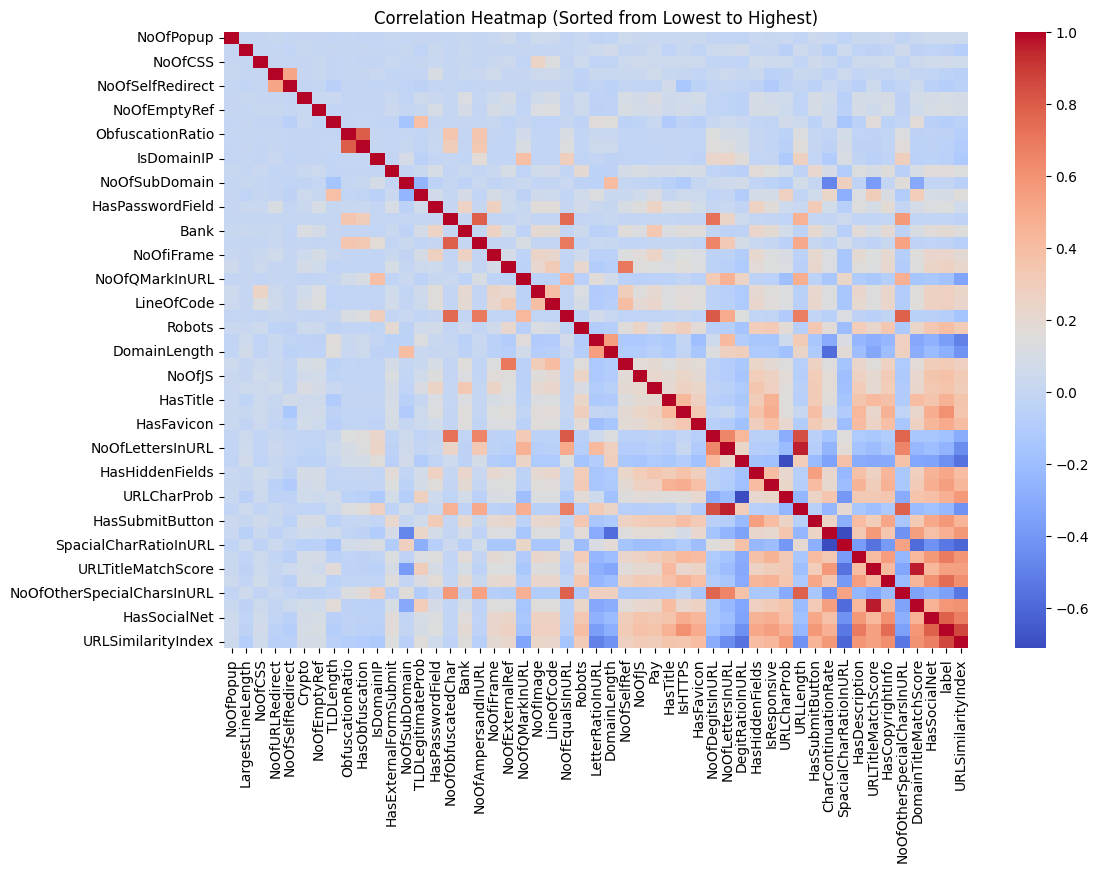

In [4]:
# Heatmap with sorted correlation (from lowest to highest)
num_df = df.select_dtypes(include=['int64', 'float64'])

# Hitung korelasi
corr = num_df.corr()

# Urutkan berdasarkan nilai korelasi total (mean absolute correlation)
sorted_cols = corr.abs().mean().sort_values().index

# Reorder baris dan kolom
corr_sorted = corr.loc[sorted_cols, sorted_cols]

plt.figure(figsize=(12, 8))
sns.heatmap(corr_sorted, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (Sorted from Lowest to Highest)")
plt.show()


###TLD Frequency Plot

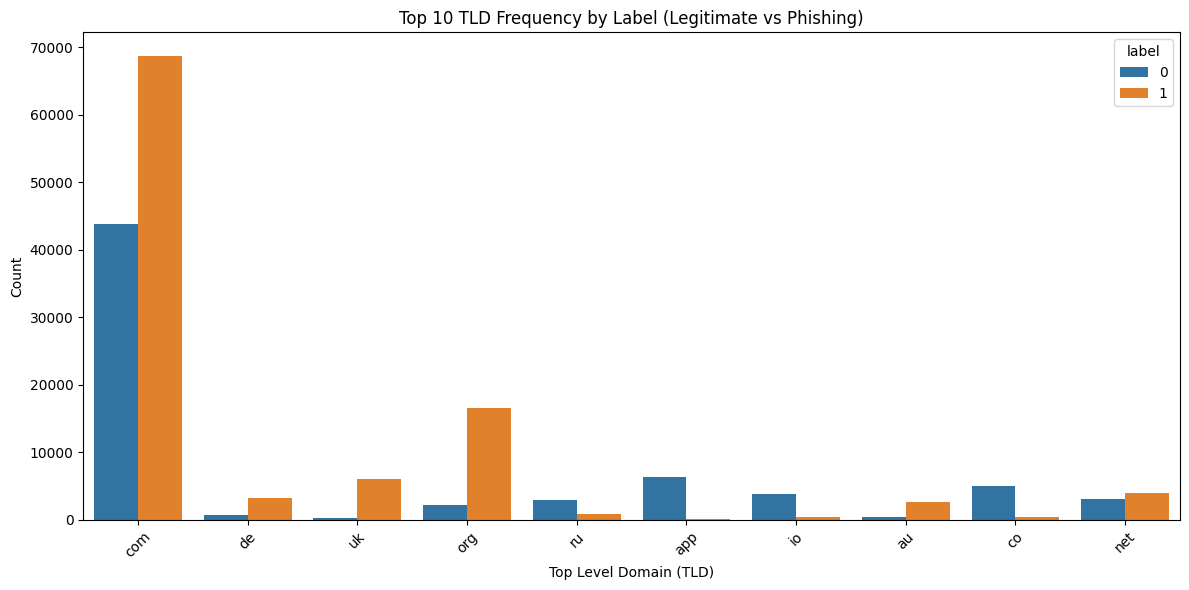

In [5]:
#TLD Frequency Plot

top10_tlds = df['TLD'].value_counts().head(10).index

df_top10 = df[df['TLD'].isin(top10_tlds)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_top10, x="TLD", hue="label")
plt.xticks(rotation=45)
plt.title("Top 10 TLD Frequency by Label (Legitimate vs Phishing)")
plt.xlabel("Top Level Domain (TLD)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



###Boxplot

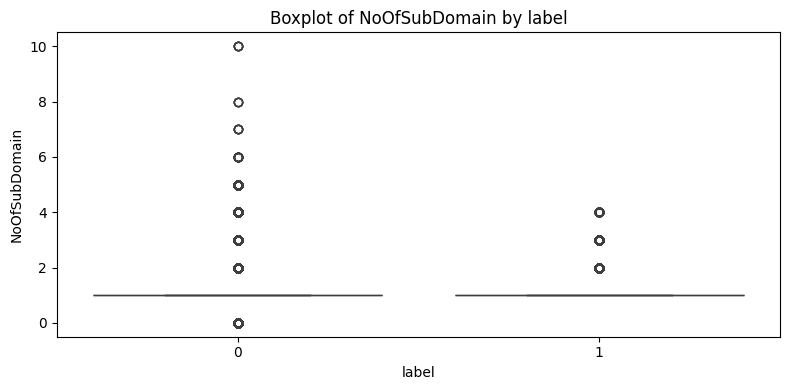

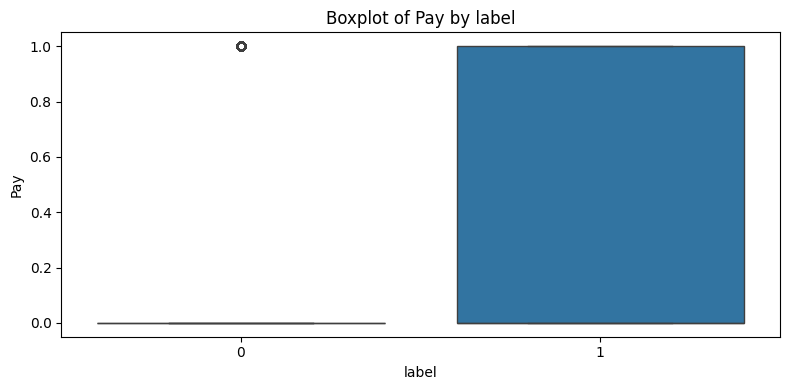

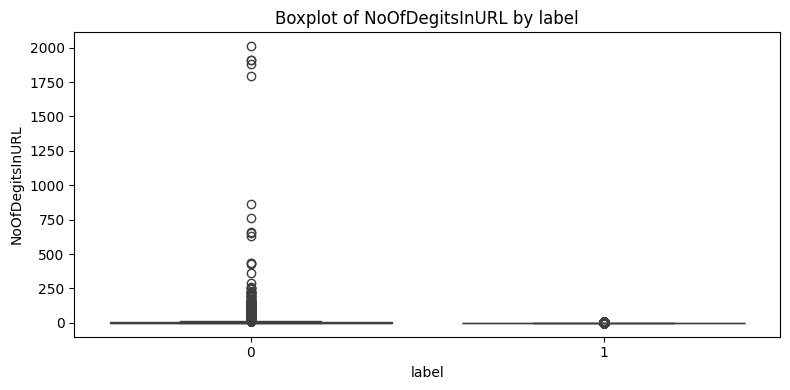

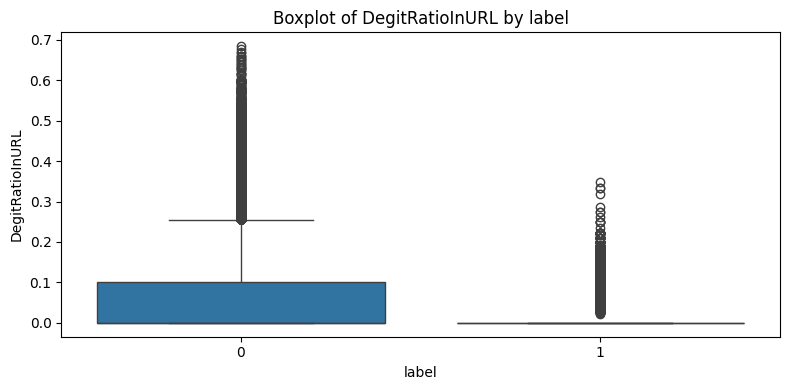

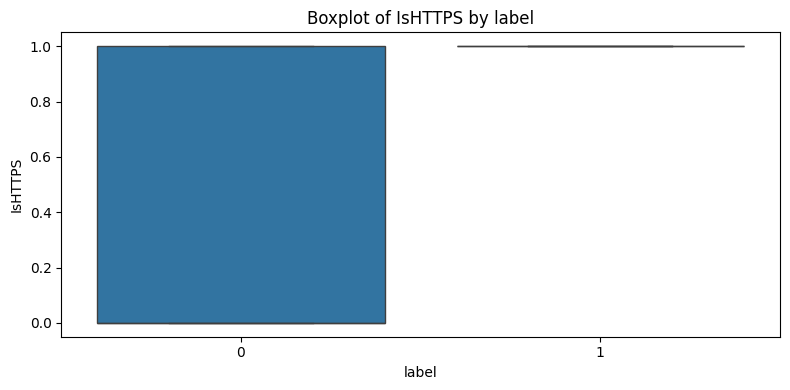

In [6]:
#Boxplot

top5_outliers = ['NoOfSubDomain', 'Pay', 'NoOfDegitsInURL',
                 'DegitRatioInURL', 'IsHTTPS']
label_col = "label"

for col in top5_outliers:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=label_col, y=col)
    plt.title(f"Boxplot of {col} by {label_col}")
    plt.tight_layout()
    plt.show()